In [1]:
#importing important libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from scipy.stats import zscore
from sklearn.preprocessing import OrdinalEncoder, power_transform, MinMaxScaler
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.linear_model import LogisticRegression, ElasticNet
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, mean_squared_error
from sklearn.tree import DecisionTreeClassifier
import pickle
import warnings 
warnings.filterwarnings('ignore')

In [2]:
# reading and loading the dataset
df = pd.read_csv(r'C:\Users\INTEL\Desktop\Projects\loan_prediction.csv')
df.head()             #creating data frame

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [3]:
#to know null values, data types, entries, memory, etc 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In the given dataset there are 4 features having float datatype, 1 feature is having integer datatype and 8 features are having object datatype, as there are various types of datatypes we have to use encoder we will use it later on.

Dataset also contain null values we will handle it also.

And contains 614 entries with 13 columns.

In [4]:
#To know the dimension of the dataset
df.shape

(614, 13)

There are 614 rows and 13 columns in the given dataset.

In [5]:
#to check datatypes of all columns
df.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

Given dataset contains various data types such as object, float, integer.

In [6]:
#viewing various columns from the dataset
df.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [7]:
#checking statistical summary
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


No numerical attributes have missing values.
The values are on different scales. 
Many machine learning models require the values to be on the same scale. We will use StandardScaler from the sklearn library to scale the features.

## EDA

In [8]:
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

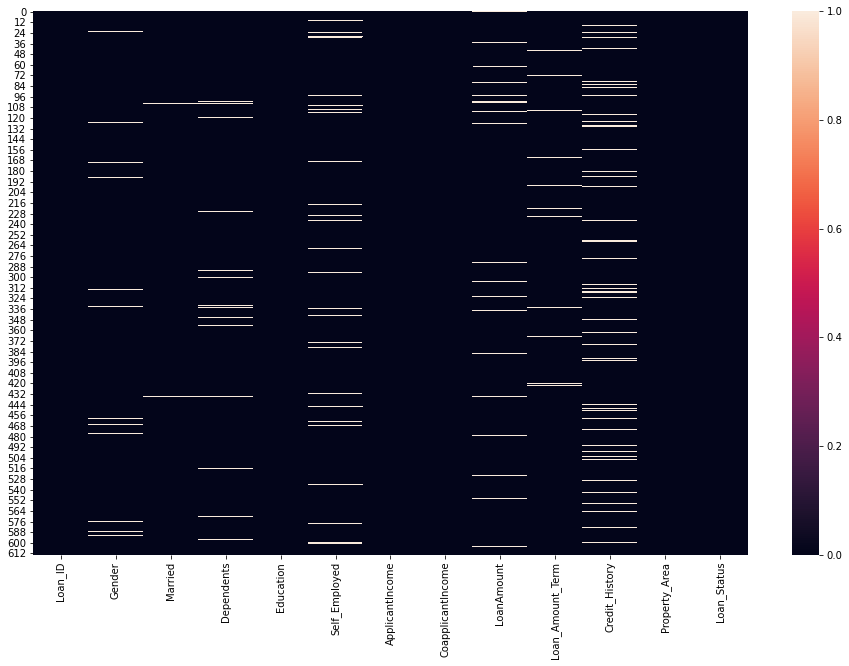

In [9]:
#another way to check missing values
plt.figure(figsize=(16,10))
sns.heatmap(df.isnull())
plt.show()                  #visualizing null values using heatmap

As form the above visualization it is seen that there are various null values we need to handle them.

For numerical values we can fill missing values with the mean and for categorical values we can fill them with the mode.

In [10]:
#categorical
df['Gender'].fillna(df['Gender'].mode()[0], inplace=True)
df['Married'].fillna(df['Married'].mode()[0], inplace=True)
df['Dependents'].fillna(df['Dependents'].mode()[0], inplace=True)
df['Loan_Amount_Term'].fillna(df['Loan_Amount_Term'].mode()[0], inplace=True)
df['Credit_History'].fillna(df['Credit_History'].mode()[0], inplace=True)
df['Self_Employed'].fillna(df['Self_Employed'].mode()[0], inplace=True)
#numerical
df['LoanAmount'].fillna(df['LoanAmount'].mean(), inplace=True)

In [11]:
#viewing null values after handling it
df.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

No null values are observed.

In [12]:
#viewing unique values of the columns
print("Number of Categories: ")
for ColName in df[['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education', 'Self_Employed','Property_Area', 'Loan_Status']]:
    print("{} = {}".format(ColName,len(df[ColName].unique())))

Number of Categories: 
Loan_ID = 614
Gender = 2
Married = 2
Dependents = 4
Education = 2
Self_Employed = 2
Property_Area = 3
Loan_Status = 2


Loan_Status is target variable and have 2 types of data so we can use Logistic Regression.

We have all mixed types of datatypes, so need to Encode the data using Ordinal Encoder.

In [13]:
#encoder
enc = OrdinalEncoder()
for i in df.columns:
    if df[i].dtypes == "object":
        df[i]=enc.fit_transform(df[i].values.reshape(-1,1))
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,0.0,1.0,0.0,0.0,0.0,0.0,5849,0.0,146.412162,360.0,1.0,2.0,1.0
1,1.0,1.0,1.0,1.0,0.0,0.0,4583,1508.0,128.000000,360.0,1.0,0.0,0.0
2,2.0,1.0,1.0,0.0,0.0,1.0,3000,0.0,66.000000,360.0,1.0,2.0,1.0
3,3.0,1.0,1.0,0.0,1.0,0.0,2583,2358.0,120.000000,360.0,1.0,2.0,1.0
4,4.0,1.0,0.0,0.0,0.0,0.0,6000,0.0,141.000000,360.0,1.0,2.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,609.0,0.0,0.0,0.0,0.0,0.0,2900,0.0,71.000000,360.0,1.0,0.0,1.0
610,610.0,1.0,1.0,3.0,0.0,0.0,4106,0.0,40.000000,180.0,1.0,0.0,1.0
611,611.0,1.0,1.0,1.0,0.0,0.0,8072,240.0,253.000000,360.0,1.0,2.0,1.0
612,612.0,1.0,1.0,2.0,0.0,0.0,7583,0.0,187.000000,360.0,1.0,2.0,1.0


1.0    422
0.0    192
Name: Loan_Status, dtype: int64


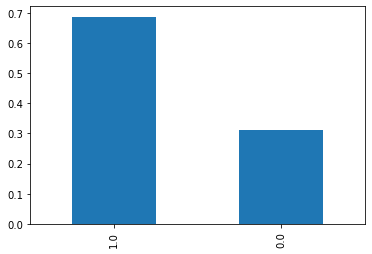

In [15]:
#visualisation of target variable by countplot
df['Loan_Status'].value_counts(normalize=True).plot.bar()           #univariate analysis
print(df["Loan_Status"].value_counts())

Loan_Status is target variable and also it contains two values 0 and 1

<AxesSubplot:>

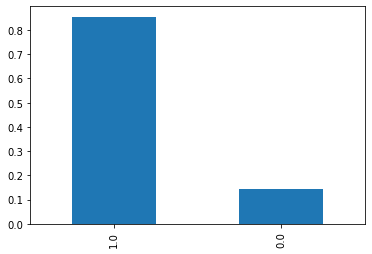

In [16]:
# visualisation of credit_history variable by countplot
df['Credit_History'].value_counts(normalize=True).plot.bar()            #univariate analysis

<AxesSubplot:xlabel='LoanAmount', ylabel='Density'>

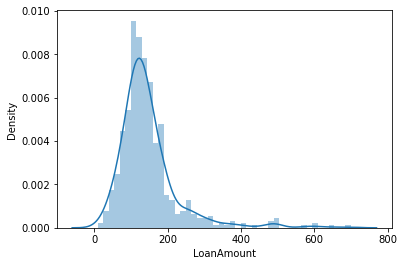

In [17]:
# visualisation of LoanAmount by distribution plot
sns.distplot(df['LoanAmount'])                    #univariate analysis

<AxesSubplot:xlabel='Gender', ylabel='Loan_Status'>

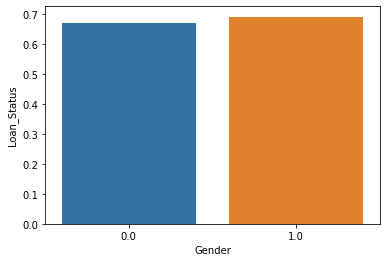

In [18]:
#visualisation of "gender" on x axis and "load_status" on y axis by countplot
sns.barplot(x='Gender',y='Loan_Status',data=df,ci=None)       #bivariate analysis

<AxesSubplot:xlabel='Married', ylabel='Loan_Status'>

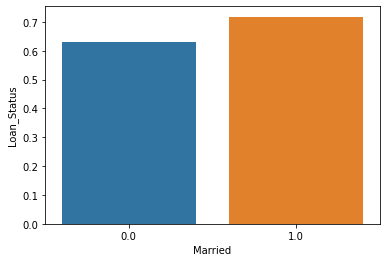

In [19]:
#visualisation of "Married" on x axis and "load_status" on y axis by countplot
sns.barplot(x='Married',y='Loan_Status',data=df,ci=None)          #bivariate analysis

<AxesSubplot:xlabel='Dependents', ylabel='Loan_Status'>

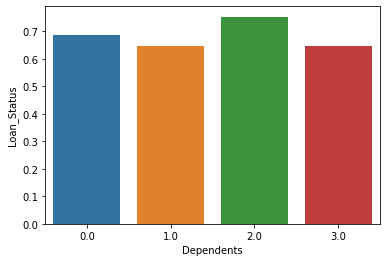

In [20]:
#visualisation of "Dependents" on x axis and "load_status" on y axis by countplot
sns.barplot(x='Dependents',y='Loan_Status',data=df,ci=None)          #bivariate analysis

<AxesSubplot:xlabel='Education', ylabel='Loan_Status'>

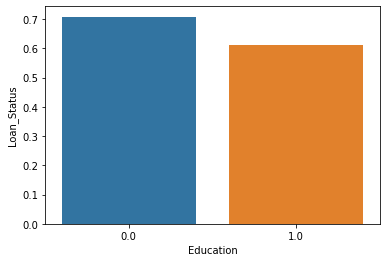

In [21]:
#visualisation of "Education" on x axis and "load_status" on y axis by countplot
sns.barplot(x='Education',y='Loan_Status',data=df,ci=None)            #bivariate analysis

<AxesSubplot:xlabel='Self_Employed', ylabel='Loan_Status'>

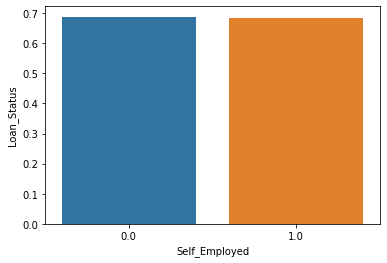

In [22]:
#visualisation of "Self_Employed" on x axis and "load_status" on y axis by countplot
sns.barplot(x='Self_Employed',y='Loan_Status',data=df,ci=None)           #bivariate analysis

<AxesSubplot:xlabel='Property_Area', ylabel='Loan_Status'>

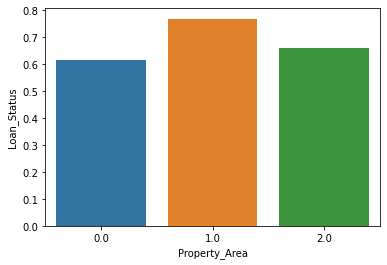

In [23]:
#visualisation of "Property_Area" on x axis and "load_status" on y axis by countplot
sns.barplot(x='Property_Area',y='Loan_Status',data=df,ci=None)              #bivariate analysis

### Correlation Matrix:

In [24]:
#viewing correlation of the dataset
df.corr()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
Loan_ID,1.000000,-0.028029,-0.016013,0.051559,0.039442,0.032874,0.016925,0.039211,0.035684,-0.033028,-0.030603,-0.155416,0.011773
Gender,-0.028029,1.000000,0.364569,0.172914,0.045364,-0.000525,0.058809,0.082912,0.107930,-0.074030,0.009170,-0.025752,0.017987
Married,-0.016013,0.364569,1.000000,0.334216,0.012304,0.004489,0.051708,0.075948,0.147141,-0.100912,0.010938,0.004257,0.091478
Dependents,0.051559,0.172914,0.334216,1.000000,0.055752,0.056798,0.118202,0.030430,0.163106,-0.103864,-0.040160,-0.000244,0.010118
Education,0.039442,0.045364,0.012304,0.055752,1.000000,-0.010383,-0.140760,-0.062290,-0.166998,-0.073928,-0.073658,-0.065243,-0.085884
Self_Employed,0.032874,-0.000525,0.004489,0.056798,-0.010383,1.000000,0.127180,-0.016100,0.115260,-0.033739,-0.001550,-0.030860,-0.003700
ApplicantIncome,0.016925,0.058809,0.051708,0.118202,-0.140760,0.127180,1.000000,-0.116605,0.565620,-0.046531,-0.018615,-0.009500,-0.004710
CoapplicantIncome,0.039211,0.082912,0.075948,0.030430,-0.062290,-0.016100,-0.116605,1.000000,0.187828,-0.059383,0.011134,0.010522,-0.059187
LoanAmount,0.035684,0.107930,0.147141,0.163106,-0.166998,0.115260,0.565620,0.187828,1.000000,0.036475,-0.001431,-0.044776,-0.036416
Loan_Amount_Term,-0.033028,-0.074030,-0.100912,-0.103864,-0.073928,-0.033739,-0.046531,-0.059383,0.036475,1.000000,-0.004705,-0.076120,-0.022549


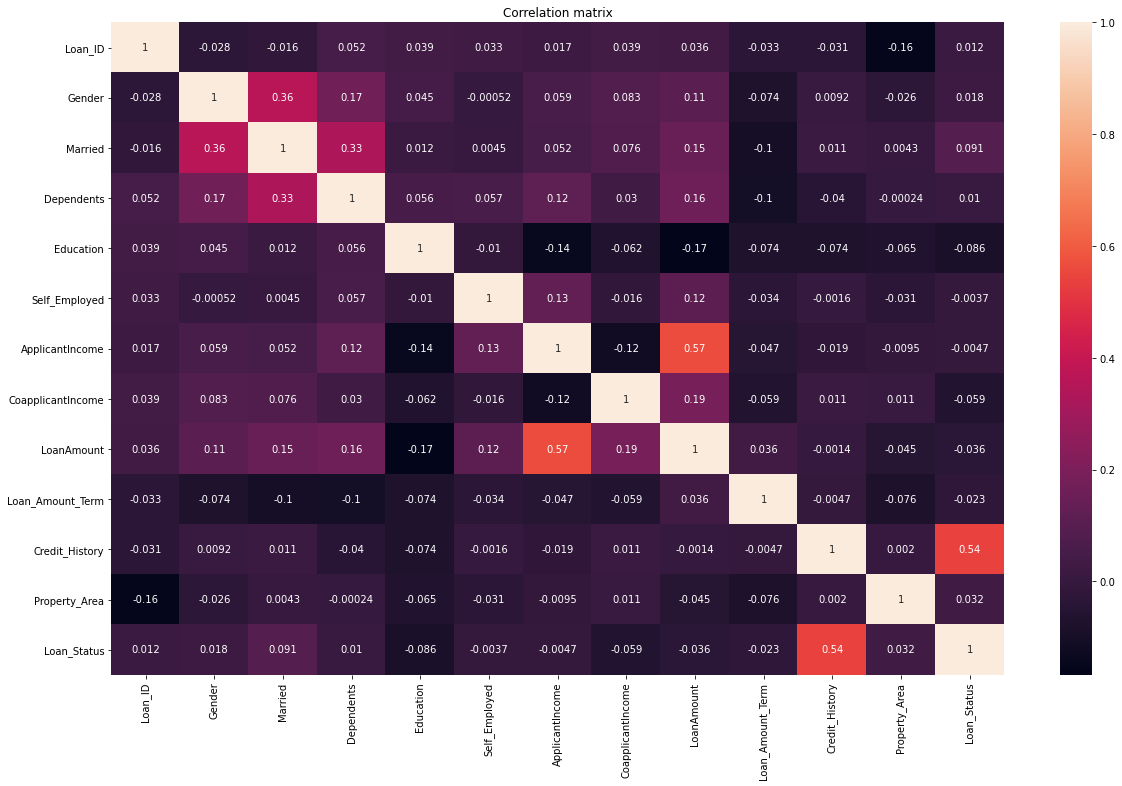

In [25]:
#checking correlation by using heatmap
corr_matrix=df.corr()
plt.figure(figsize=(20,12))
plt.title("Correlation matrix")
sns.heatmap(corr_matrix, annot=True)      #visualizing correlation by using heatmap
plt.show()

In [26]:
corr_matrix["Loan_Status"].sort_values(ascending=False)

Loan_Status          1.000000
Credit_History       0.540556
Married              0.091478
Property_Area        0.032112
Gender               0.017987
Loan_ID              0.011773
Dependents           0.010118
Self_Employed       -0.003700
ApplicantIncome     -0.004710
Loan_Amount_Term    -0.022549
LoanAmount          -0.036416
CoapplicantIncome   -0.059187
Education           -0.085884
Name: Loan_Status, dtype: float64

The most correlated variable is Credit_History and the least correlated variable is education.

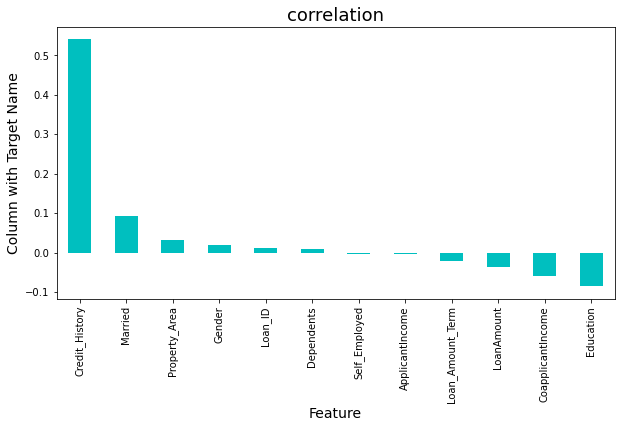

In [27]:
#visualisation of correlation by barplot
plt.figure(figsize=(10,5))
df.corr()['Loan_Status'].sort_values(ascending=False).drop(['Loan_Status']).plot(kind='bar',color='c')
plt.xlabel('Feature',fontsize=14)
plt.ylabel('Column with Target Name',fontsize=14)
plt.title('correlation',fontsize=18)
plt.show()

### Checking for outliers

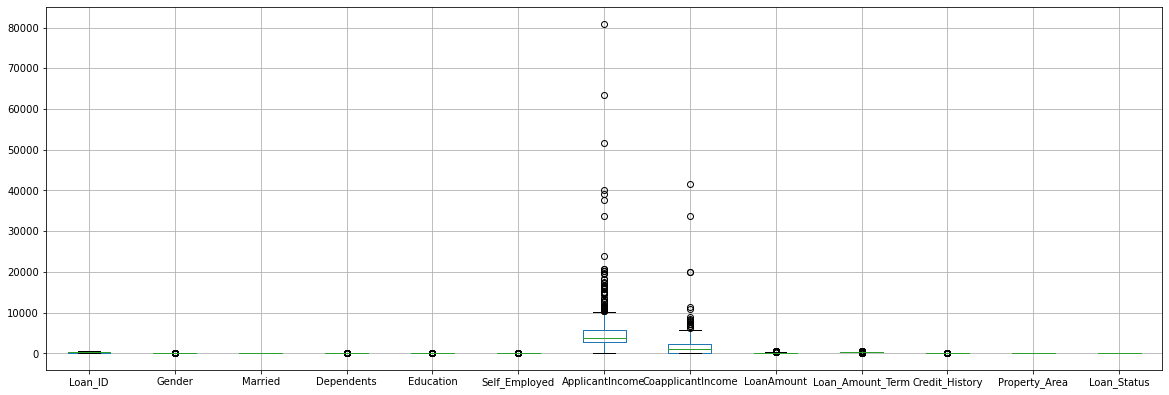

In [28]:
#checking outliers
df.iloc[:,:].boxplot(figsize=[20,8])
plt.subplots_adjust(bottom=0.25)
plt.show()

### Removing Outliers:

In [29]:
z= np.abs(zscore(df))
threshold = 3
print(np.where(z< 3))

(array([  0,   0,   0, ..., 613, 613, 613], dtype=int64), array([ 0,  1,  2, ..., 10, 11, 12], dtype=int64))


In [30]:
#removing outliers
df_new = df[(z< 3).all(axis=1)]

#### Rechecking of removal of outliers:

In [31]:
#Before removing Outliers
df.shape

(614, 13)

In [32]:
#After removing outliers
df_new.shape

(577, 13)

In [33]:
df=df_new

Seperating Independent Variables and Dependent Variables(Target Variables)

In [34]:
# x= independent variable
x = df.iloc[:,0:-1]
x.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,0.0,1.0,0.0,0.0,0.0,0.0,5849,0.0,146.412162,360.0,1.0,2.0
1,1.0,1.0,1.0,1.0,0.0,0.0,4583,1508.0,128.000000,360.0,1.0,0.0
2,2.0,1.0,1.0,0.0,0.0,1.0,3000,0.0,66.000000,360.0,1.0,2.0
3,3.0,1.0,1.0,0.0,1.0,0.0,2583,2358.0,120.000000,360.0,1.0,2.0
4,4.0,1.0,0.0,0.0,0.0,0.0,6000,0.0,141.000000,360.0,1.0,2.0


In [35]:
#y = target variable = Loan_Status
y = df.iloc[:,-1]
y.head()

0    1.0
1    0.0
2    1.0
3    1.0
4    1.0
Name: Loan_Status, dtype: float64

### Checking skewness:

In [36]:
#skewness
x.skew()

Loan_ID              0.010879
Gender              -1.622920
Married             -0.630211
Dependents           1.052106
Education            1.306588
Self_Employed        2.252848
ApplicantIncome      2.148522
CoapplicantIncome    1.350517
LoanAmount           1.113132
Loan_Amount_Term    -2.098806
Credit_History      -1.976043
Property_Area       -0.055332
dtype: float64

Skewness is present in every column we need to remove it.

Max skewness= Self_Employed then , Applicant Income and then,so on

### Removing Skewness:

In [37]:
#removing skew by power transform method
z = power_transform(x[0:])
data_new= pd.DataFrame(z,columns=x.columns)
x = data_new

In [38]:
#after removing skewness
x.skew()

Loan_ID             -0.284298
Gender              -1.622920
Married             -0.630211
Dependents           0.478360
Education            1.306588
Self_Employed        2.252848
ApplicantIncome      0.027981
CoapplicantIncome   -0.191876
LoanAmount           0.047692
Loan_Amount_Term     0.727533
Credit_History      -1.976043
Property_Area       -0.155094
dtype: float64

As we can see after checking corelation and skewness, Self_Employed column is not that much correlated infact it is negatively correlated, so one can't drop that column.

<AxesSubplot:xlabel='ApplicantIncome', ylabel='Density'>

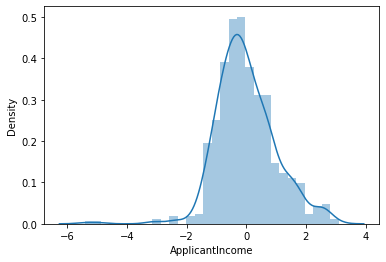

In [39]:
#visualisation of "applicant_income" feature by distribution plot
df_visual= x[['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term', 'Credit_History']].copy()
sns.distplot(df_visual['ApplicantIncome'],kde=True)

Overfitting is not there.

<AxesSubplot:xlabel='CoapplicantIncome', ylabel='Density'>

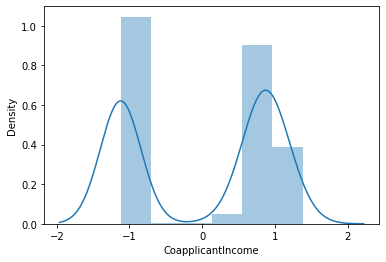

In [40]:
#visualisation of "CoapplicantIncome" feature by distribution plot
sns.distplot(df_visual['CoapplicantIncome'],kde=True)

There is an overfittting.

<AxesSubplot:xlabel='Credit_History', ylabel='Density'>

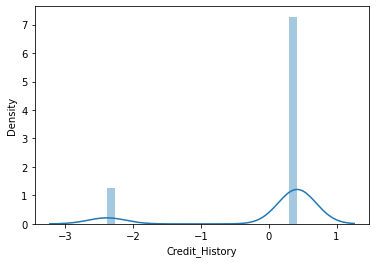

In [41]:
#visualisation of "Credit_History" feature by distribution plot
sns.distplot(df_visual['Credit_History'],kde=True)

### Scaling:

As the range of data is varying we can use Min-Max scaler to limit the ranfe of data between 0 to 1.

In [42]:
#scaling using min-max scaler
mms = MinMaxScaler()
x=mms.fit_transform(x)

In [43]:
#splitting by train-test split method
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.33,random_state = 42)
lm = LogisticRegression()
lm.fit(x_train,y_train)
lm.score(x_train,y_train)

0.8082901554404145

In [44]:
#prediction of the values
pred=lm.predict(x_test)
print("Predicted",pred)
print("Actual",y_test)

Predicted [0. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 0. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1.
 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 0. 0. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 0. 1. 1. 1. 1. 1. 1. 0.
 0. 0. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 0. 0. 1. 1. 0. 1. 1. 1. 0.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 0. 1. 0. 0. 1. 1. 1. 0. 0.
 1. 1. 1. 1. 1. 1. 0. 0. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 0.]
Actual 122    1.0
414    0.0
544    1.0
105    1.0
461    1.0
      ... 
447    0.0
118    0.0
148    0.0
587    1.0
7      0.0
Name: Loan_Status, Length: 191, dtype: float64


In [45]:
#Accuracy score
print('Accuracy Score:',accuracy_score(y_test,pred))

Accuracy Score: 0.837696335078534


This accuracy Score is without removing overfitting and underfitting

#### Finding Best Random State:

In [46]:
# knowing best random state for best accuracy
maxAccu=0
maxRS=0
for i in range(1,200):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.33,random_state = i)
LR = LogisticRegression()
LR.fit(x_train,y_train)
predrf = LR.predict(x_test)
acc =accuracy_score(y_test,predrf)
if acc > maxAccu:
    maxAccu = acc
maxRS = i

print("Best score is: ",maxAccu,"on Random_state",maxRS)

Best score is:  0.806282722513089 on Random_state 199


#### Train_Test model based:

In [47]:
#train test for Best Random State
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.33,random_state = 12)
LR = LogisticRegression()
LR.fit(x_train,y_train)
predrf = LR.predict(x_test)

In [48]:
#printing accuracy score, confusion matrix and classification report of the data
print('Accuracy Score:', accuracy_score(y_test,predrf))
print('Confusion Matrix:', confusion_matrix(y_test,predrf))
print('Classification Report:', classification_report(y_test,predrf))

Accuracy Score: 0.8900523560209425
Confusion Matrix: [[ 28  20]
 [  1 142]]
Classification Report:               precision    recall  f1-score   support

         0.0       0.97      0.58      0.73        48
         1.0       0.88      0.99      0.93       143

    accuracy                           0.89       191
   macro avg       0.92      0.79      0.83       191
weighted avg       0.90      0.89      0.88       191



### Decision Tree Classifier:

In [49]:
#knowing accuracy score, confusion matrix and classification by decision tree classifier
dt = DecisionTreeClassifier()
dt.fit(x_train,y_train)
preddt = dt.predict(x_test)
print('Accuracy Score:', accuracy_score(y_test,preddt))
print('Confusion Matrix:', confusion_matrix(y_test,preddt))
print('Classification Report:', classification_report(y_test,preddt))

Accuracy Score: 0.7225130890052356
Confusion Matrix: [[ 33  15]
 [ 38 105]]
Classification Report:               precision    recall  f1-score   support

         0.0       0.46      0.69      0.55        48
         1.0       0.88      0.73      0.80       143

    accuracy                           0.72       191
   macro avg       0.67      0.71      0.68       191
weighted avg       0.77      0.72      0.74       191



#### Finding best fold:

In [50]:
#best fold of the data by accuracy score
pred_train = LR.predict(x_train)
pred_test =LR.predict(x_test)
Train_accuracy = accuracy_score(y_train,pred_train)
Test_accuracy = accuracy_score(y_test,pred_test)
maxAccu=0
maxRS=0

In [51]:
#viewing cv score and accuracy score
for j in range(2,16):
    cv_score=cross_val_score(LR,x,y,cv=j)
    cv_mean = cv_score.mean()
if cv_mean > maxAccu:
    maxAccu = cv_mean
    maxRS = j
print(f"At cross fold {j} cv score is {cv_mean} and accuracy score training is {Train_accuracy} and accuracy for the testing is {Test_accuracy}")
print("\n")


At cross fold 15 cv score is 0.8183085919928026 and accuracy score training is 0.7849740932642487 and accuracy for the testing is 0.8900523560209425




### Cross Validation score:

In [52]:
# Cross Validation score for Logistic Regrssion
cv_score=cross_val_score(LR,x,y,cv=j)
cv_mean = cv_score.mean()
print("Cross validation score for Logistic Regression",cv_mean)

Cross validation score for Logistic Regression 0.8183085919928026


In [53]:
# Cross Validation score for Decision Tree Classifier
cv_score=cross_val_score(dt,x,y,cv=j)
cv_mean = cv_score.mean()
print("Cross validation score for Decision Tree",cv_mean)

Cross validation score for Decision Tree 0.6871345029239765


The minimum difference between Accuracy and Cross validation is of Decision Tree Classifier hence, it is proven the Best Alogorithm for this model.

### Regularization:

For mitigating the problem of overfitting and underfitting Regularization Methods are used like Lasso, Ridge or ElasticNet.

In [54]:
#Regularization by "electricnet"
parameters = {'alpha':[.0001,.001,.01,.1,1,10],'random_state':list(range(0,10))}
EN=ElasticNet()
clf=GridSearchCV(EN,parameters)
clf.fit(x_train,y_train)
print(clf.best_params_)

{'alpha': 0.01, 'random_state': 0}


In [55]:
EN = ElasticNet(alpha=0.01,random_state=0)
EN.fit(x_train,y_train)
EN.score(x_train,y_train)
pred_EN=EN.predict(x_test)
lss= accuracy_score(y_test,pred_test)
lss

0.8900523560209425

In [56]:
#cross_validation_mean = cv_mean
#cross_validation_score= cv_score
cross_validation_score = cross_val_score(EN,x,y,cv=5)
cross_validation_mean = cross_validation_score.mean()
cross_validation_mean


0.30923553211785254

### Essembling technique:

In [57]:
#essembling by GridSearchCV
parameters = {'max_depth':np.arange(2,15),'criterion':["gini","entrophy"]}
rf = DecisionTreeClassifier()
clf=GridSearchCV(rf,parameters,cv=5)
clf.fit(x_train,y_train)
print(clf.best_params_)

{'criterion': 'gini', 'max_depth': 2}


In [58]:
rf=DecisionTreeClassifier(criterion="gini",max_depth=2)
rf.fit(x_train,y_train)
rf.score(x_train,y_train)
pred_decision=rf.predict(x_test)

rfs = accuracy_score(y_test,pred_decision)
print('Accuracy Score:',rfs*100)

rfscore=cross_val_score(rf,x,y,cv=5)
rfc=rfscore.mean()

print("Cross Validation Score:",rfc*100)
#print(clf.best_params_)

Accuracy Score: 88.48167539267016
Cross Validation Score: 81.29085457271363


### Saving the model:

In [59]:
#saving the model by using pickle
filename = "Loan_Prediction.pkl"
pickle.dump(rf,open(filename,"wb"))

### Loading the data:

In [60]:
loaded_model=pickle.load(open('Loan_Prediction.pkl','rb'))
result=loaded_model.score(x_test,y_test)
print(result)

0.8848167539267016


### Conclusion:

In [61]:
conclusion = pd.DataFrame([loaded_model.predict(x_test)[:],pred_decision[:]],index=["Predicted","Original"])
conclusion

,0,1,2,3,4,5,6,7,8,9,...,181,182,183,184,185,186,187,188,189,190
Predicted,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,0.0,1.0
Original,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,0.0,1.0


The model shows 88% accuracy, which predicts the status of loan.